**Loading Python Libaries**

In [2]:
import os
import cv2
import numpy as np
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

**Load Dataset and Convert to Gray Scale (32x32)**

Showing grayscale image for: dogs_00096.jpg


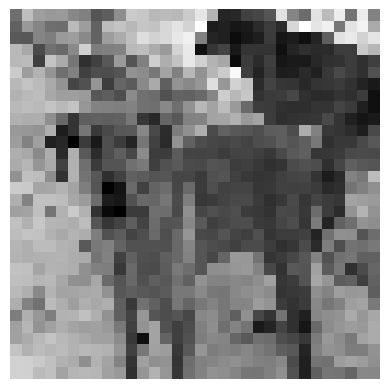

Showing grayscale image for: dogs_00093.jpg


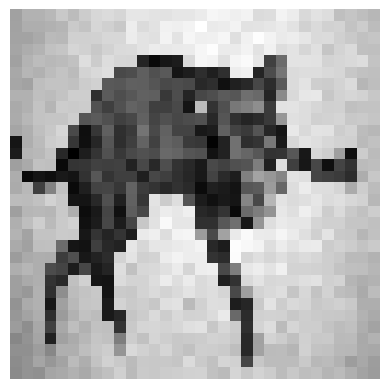

Showing grayscale image for: dogs_00097.jpg


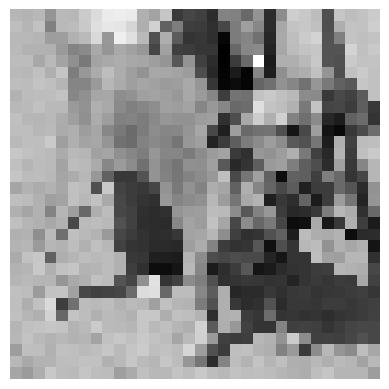

Showing grayscale image for: dogs_00092.jpg


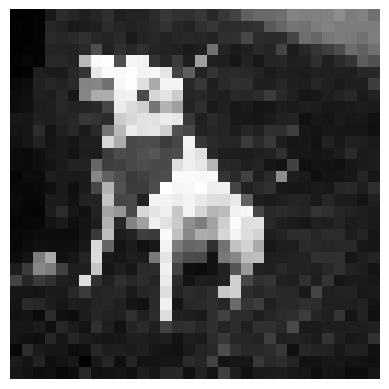

Showing grayscale image for: dogs_00086.jpg


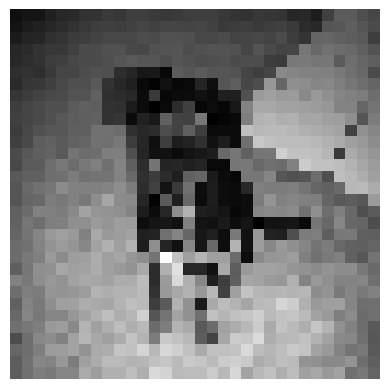

Showing grayscale image for: dogs_00076.jpg


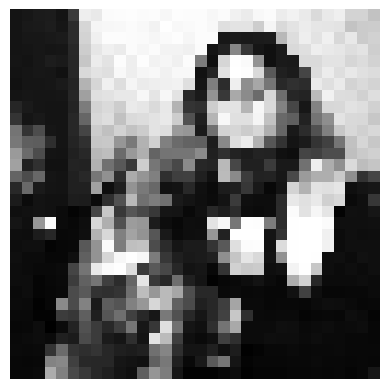

Train size: 240
Test size: 60
{'dog': 0, 'cat': 1, 'panda': 2}


In [15]:
def load_images(path, show_preview=False):
    X = []
    y = []
    classes = os.listdir(path)

    label_map = {cls: idx for idx, cls in enumerate(classes)}
    preview_count = 0

    for cls in classes:
        folder = os.path.join(path, cls)
        for img_name in os.listdir(folder):
            img_path = os.path.join(folder, img_name)

            img = cv2.imread(img_path)
            img = cv2.resize(img, (32, 32))
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            if show_preview and preview_count < 6:
                print("Showing grayscale image for:", img_name)
                plt.imshow(gray, cmap="gray")
                plt.axis("off")
                plt.show()
                preview_count += 1

            X.append(gray.flatten())
            y.append(label_map[cls])

    return np.array(X), np.array(y), label_map

train_path = "drive/MyDrive/animal_dataset"

X, y, label_map = load_images(train_path, show_preview=True)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

print("Train size:", len(X_train))
print("Test size:", len(X_test))
print(label_map)

**Distance Functions (L1 & L2)**

In [7]:
def manhattan_distance(a, b):
    return np.sum(np.abs(a - b))

def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b)**2))

**KNN Implementation**

In [8]:
def knn_predict(test_point, X_train, y_train, K, distance_type):
    distances = []

    for idx, x in enumerate(X_train):
        if distance_type == "L1":
            d = manhattan_distance(test_point, x)
        else:
            d = euclidean_distance(test_point, x)

        distances.append((d, y_train[idx]))

    distances.sort(key=lambda x: x[0])

    k_labels = [label for _, label in distances[:K]]

    return max(set(k_labels), key=k_labels.count)

**5-Fold Cross-Validation**

In [9]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
K_values = [1, 3, 5, 7, 9]
acc_L1 = []
acc_L2 = []

for K in K_values:
    fold_acc_L1 = []
    fold_acc_L2 = []

    for train_index, test_index in kf.split(X):
        X_train, X_val = X[train_index], X[test_index]
        y_train, y_val = y[train_index], y[test_index]

        correct = 0
        for i in range(len(X_val)):
            pred = knn_predict(X_val[i], X_train, y_train, K, "L1")
            if pred == y_val[i]:
                correct += 1
        fold_acc_L1.append(correct / len(X_val))

        correct = 0
        for i in range(len(X_val)):
            pred = knn_predict(X_val[i], X_train, y_train, K, "L2")
            if pred == y_val[i]:
                correct += 1
        fold_acc_L2.append(correct / len(X_val))

    acc_L1.append(np.mean(fold_acc_L1))
    acc_L2.append(np.mean(fold_acc_L2))

**Plot K vs Accuracy**

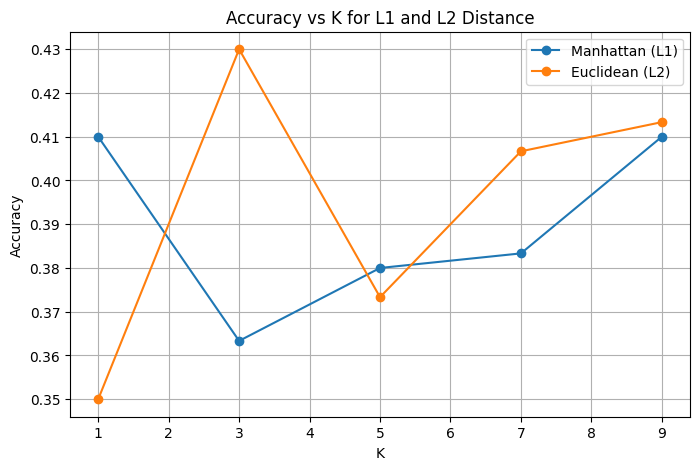

In [10]:
plt.figure(figsize=(8, 5))
plt.plot(K_values, acc_L1, marker='o', label="Manhattan (L1)")
plt.plot(K_values, acc_L2, marker='o', label="Euclidean (L2)")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K for L1 and L2 Distance")
plt.legend()
plt.grid(True)
plt.show()

**Top 5 Predictions**


Top 5 Predictions:

Image 1: Predicted → dog


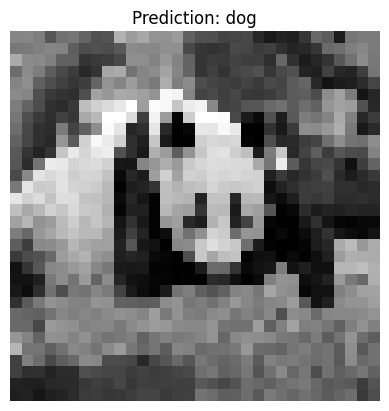


Image 2: Predicted → cat


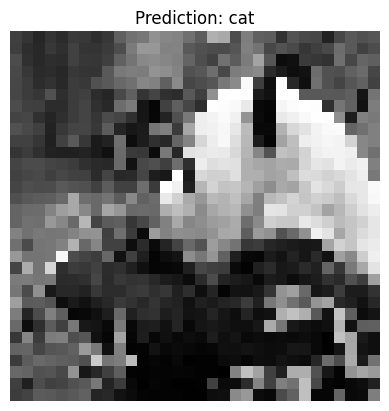


Image 3: Predicted → dog


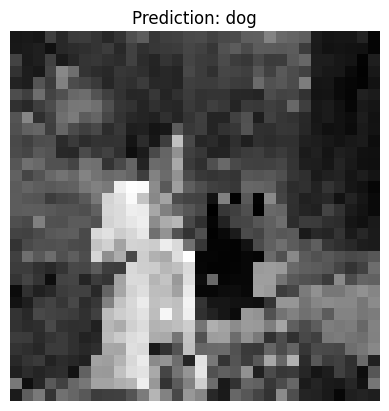


Image 4: Predicted → cat


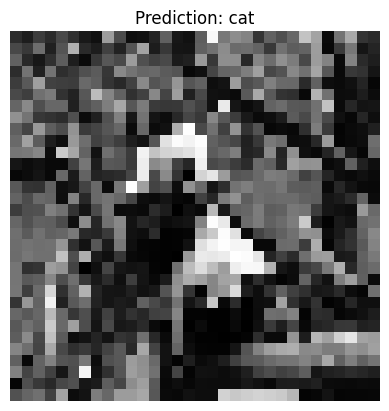


Image 5: Predicted → cat


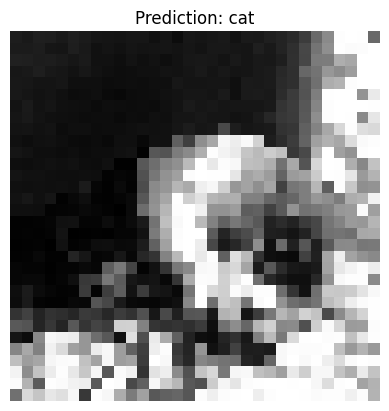

In [13]:
reverse_map = {v: k for k, v in label_map.items()}

print("\nTop 5 Predictions:")
for i in range(min(5, len(X_test))):
    pred = knn_predict(X_test[i], X, y, 5, "L2")

    print(f"\nImage {i+1}: Predicted → {reverse_map[pred]}")

    img_show = X_test[i].reshape(32, 32)

    plt.imshow(img_show, cmap='gray')
    plt.title(f"Prediction: {reverse_map[pred]}")
    plt.axis('off')
    plt.show()
